In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Sambhaji\AppData\Local\Temp\ipykernel_6468\2743217303.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.size

800

In [7]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


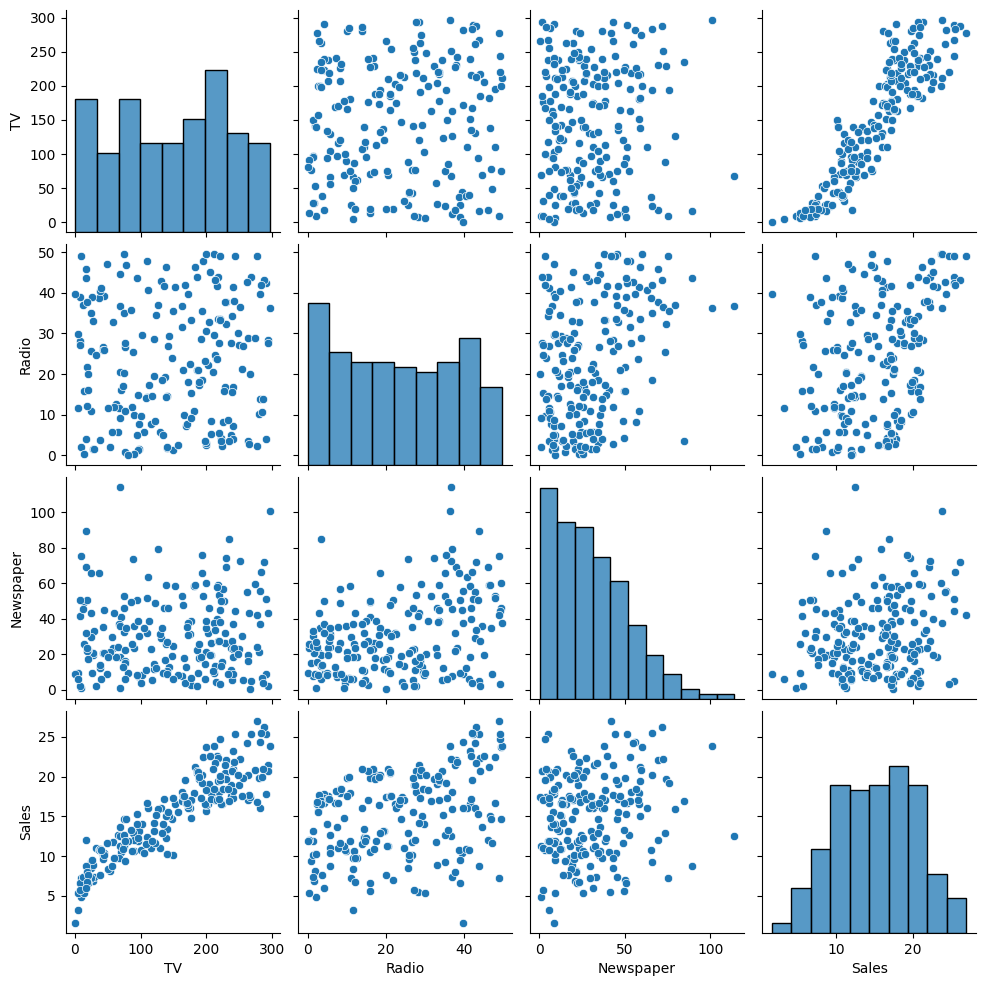

In [14]:
sns.pairplot(df)

Text(0.5, 1.0, 'TV vs Sales')

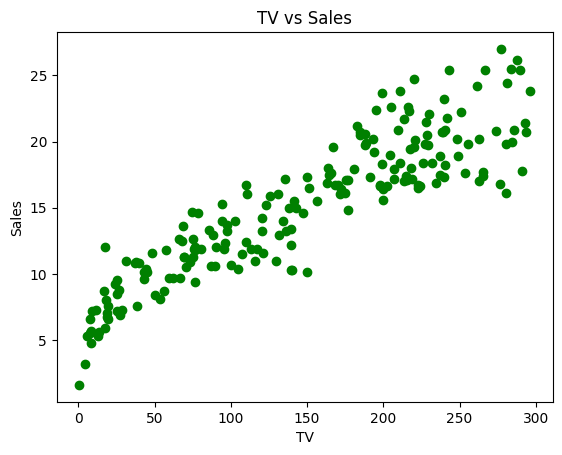

In [16]:
plt.scatter(df['TV'], df["Sales"], color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

Text(0.5, 1.0, 'Radio vs Sales')

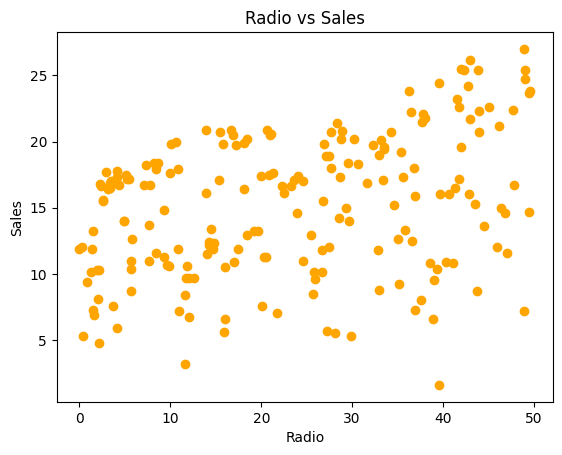

In [17]:
plt.scatter(df['Radio'], df["Sales"], color='orange')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

<Axes: xlabel='TV', ylabel='Sales'>

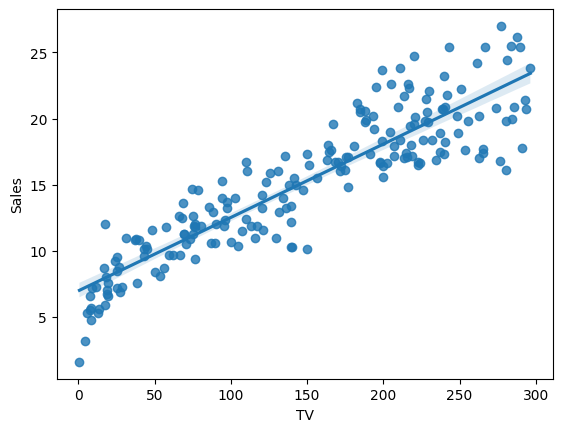

In [18]:
sns.regplot(x='TV', y='Sales', data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

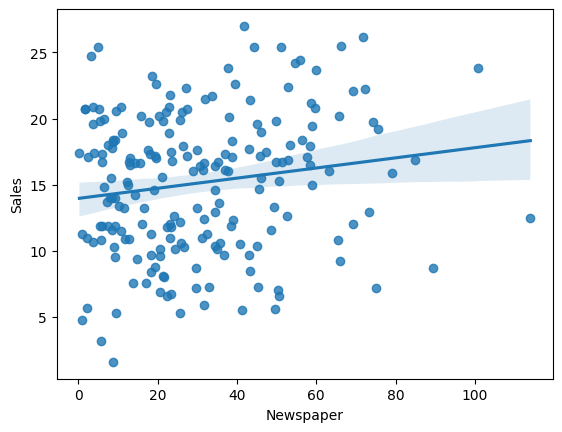

In [19]:
sns.regplot(x='Newspaper', y='Sales', data=df)

In [20]:
# First we divide our features into Independent & Dependent features

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [24]:
# Train/Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [26]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [27]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) #Do NOT fit test set

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [30]:
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
# Printing coefficients 
print('Coefficients:', lr.coef_)

Coefficients: [4.58720774 1.48984025 0.08791597]


In [32]:
# Printing intercept
print('Intercept:', lr.intercept_)

Intercept: 15.330625000000003


In [34]:
# Lets see which parameters the model has been trained on
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
reg_pred = lr.predict(x_test)
reg_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

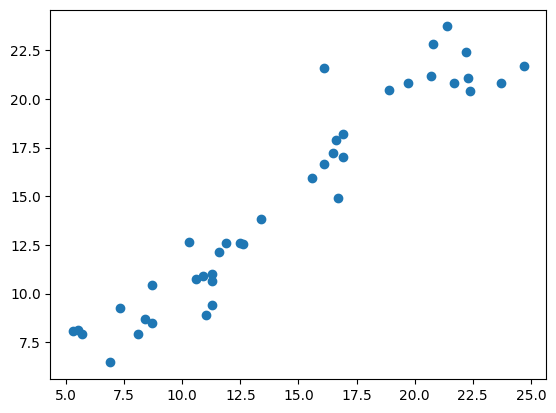

In [37]:
# Scatter Prediction
plt.scatter(y_test, reg_pred)

In [38]:
# Residuals (Errors)
residuals = y_test-reg_pred
residuals

95    -0.134772
15     1.990260
30    -2.323989
158   -1.972785
128    3.017281
115    0.030598
69     1.218805
170   -0.290350
174   -0.737013
45    -0.566575
66     2.076035
182    0.218266
165   -1.307512
78    -2.767507
186   -2.345510
177    1.768372
56    -2.628146
152   -1.298766
82     0.291194
68    -1.578328
124   -1.106318
16    -0.098833
148   -0.005183
93    -0.188548
65     1.882039
60     0.174933
84     0.860915
67    -0.415209
125   -0.170809
132   -2.226825
9     -0.359474
18     0.665091
55     2.897080
75    -1.734342
150   -5.478475
104   -0.483645
135   -0.528218
137   -2.009533
164   -0.709928
76     0.435587
Name: Sales, dtype: float64

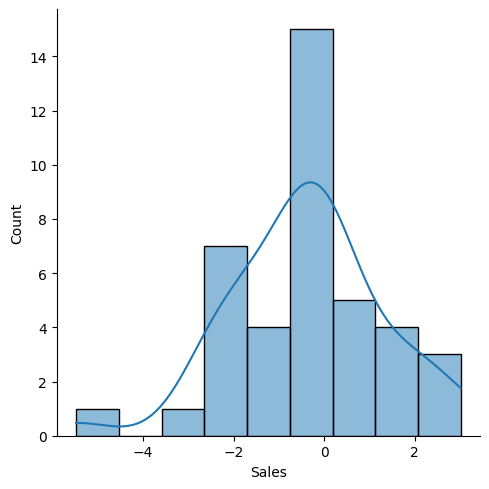

In [39]:
# Plotting Residuals
sns.displot(residuals, kde=True)

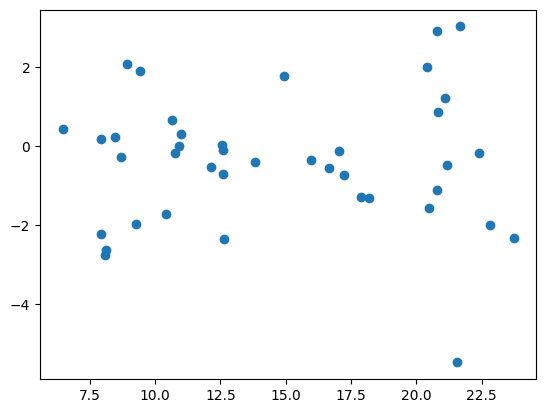

In [40]:
# Scatter with respect to predictions & residuals

plt.scatter(reg_pred, residuals)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [42]:
print('Mean Squared Error:', mean_squared_error(y_test, reg_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, reg_pred))

print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, reg_pred)))

Mean Squared Error: 2.9077569102710923
Mean Absolute Error: 1.2748262109549349
Root Mean Squared Error 1.7052146229349232


In [43]:
# R2

score = r2_score(y_test, reg_pred)
print('R2:', score)

R2: 0.9059011844150826


In [45]:
# Adjusted R2

adj_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted R2:', adj_r2)

Adjusted R2: 0.8980596164496728
